In [27]:
import numpy as np

class GaussianMixtureGenerator:
    
    def __init__(self,
                 n_generator: int,
                generator_variance: float = 3.,
                feature_dim: int = 2):
        
        self.n_generator = n_generator
        self.feature_dim = feature_dim
        self.means = np.random.normal(0, generator_variance, size=(n_generator, feature_dim))
        self.vars = np.random.uniform(0, 3, size=(n_generator, feature_dim))
        
    def __call__(self, n_data: int):
        xs = []
        ys = []
        for i in range(self.n_generator):
            for _ in range(n_data):
                xs.append(np.random.normal(self.means[i], self.vars[i], size=self.feature_dim))
                ys.append(i)
        return np.array(xs), ys

In [41]:
gen = GaussianMixtureGenerator(n_generator=2)
xs, ys = gen(100)

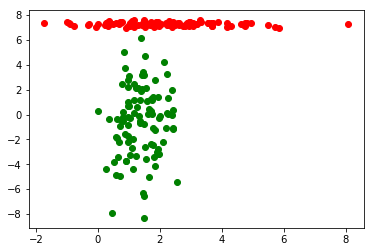

In [42]:
%matplotlib inline

from scripts.visualizers import draw_scatter

draw_scatter(xs, ys)

In [53]:
from models.k_means import KMeans
model = KMeans(n_clusters=2, n_dim=2, distance_metric='cosine')
model.fit(xs)

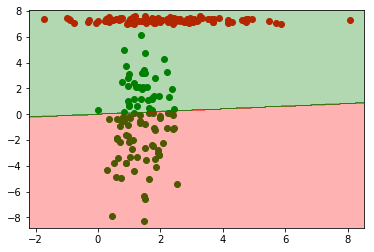

In [54]:
draw_scatter(xs, ys, classifier=model)